# Fourier transform
- Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Recall integrals

In [21]:
def integralTrapezoidal(data):
    a = 0
    for i in range( len(data[0]) - 1 ):
        a = a + ( data[1,i+1] + data[1,i] ) / 2 * ( data[0,i+1] - data[0, i] )
    return a

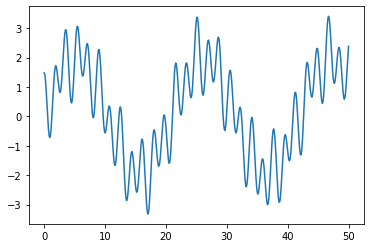

In [22]:
tList = np.linspace(0, 50, 501)

freq1 = 2.0
freq2 = 0.3
freq3 = 3.5


yList = 0.5*np.cos(tList*freq1+0.3) + 2.0*np.sin(tList*freq2) + 1.0*np.cos(tList*freq3)

data = np.array([tList, yList])

plt.plot(data[0], data[1])

In [23]:
integralTrapezoidal(data)

11.373146764083113

## Fourier transform to find characteristic frequencies

\\(
\tilde{y}(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} y(t) e^{i\omega t}\mathrm{d}t
\\)

In [24]:
omega = 0.3

integrand = np.array([tList, 1/np.sqrt(2*np.pi) *yList * np.exp(1j*omega*tList)])

print(abs(integralTrapezoidal(integrand))**2)

420.16655955096377


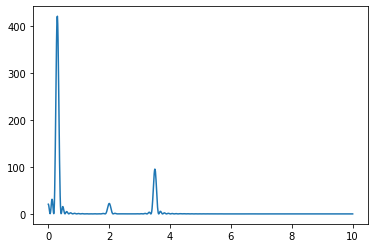

In [25]:
omega = np.linspace(0, 10, 1001)

res = []

for w in omega:
    integrand = np.array([tList, 1/np.sqrt(2*np.pi) * yList * np.exp(1j*w*tList)])
    res.append(abs(integralTrapezoidal(integrand))**2)

plt.plot(omega, res)

## Use numpy module: Fast Fourier transform (FFT)

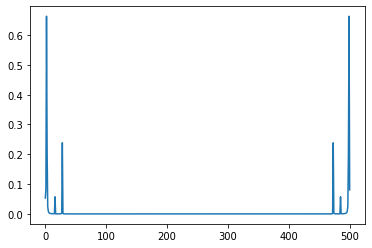

In [26]:
ft = np.fft.fft(yList)/len(yList)

plt.plot(abs(ft)**2 ) 

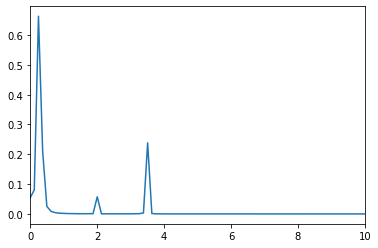

In [27]:
frequencies = np.arange(len(yList)) / ( len(yList)*0.1 )

plt.xlim([0, 10])
plt.plot( frequencies*2*np.pi, abs(ft)**2 ) 